In [175]:
# ECGR 4105-080 Assignment 3
# Anthony Almonte
# #800916043
# 7/7/25

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd     # import libraries
import seaborn as sbrn

from sklearn.model_selection import train_test_split # training/validation data split
from sklearn.preprocessing import StandardScaler     # Standardization
from sklearn.preprocessing import MinMaxScaler       # Normalization

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics                          # accuracy, precision, recall

from sklearn.naive_bayes import GaussianNB           # Naive Bayes
from sklearn.decomposition import PCA                # PCA

In [176]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR 4105 csv/diabetes.csv' # Google Drive file path
file_path_2 = '/content/drive/My Drive/ECGR 4105 csv/cancer.csv'

df = pd.DataFrame(pd.read_csv(file_path))
df_2 = pd.DataFrame(pd.read_csv(file_path_2))

df.head() # obtains first 'n' rows from dataset, n=5
M=len(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [177]:
#df.describe()
#df.head(10)

In [178]:
#df_2.describe()

In [179]:
X_1 = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values # .iloc indexing: .iloc[rows, cols]
Y_1 = df.iloc[:, 8]

#X_0[:5]

In [180]:
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_1, Y_1, test_size = 0.2, train_size = 0.8, random_state=42) # training/validation split

stdX = StandardScaler()                   # feature scaling
X_train1 = stdX.fit_transform(X_train1)   # fit - calculate mean and std deviation for each feature
X_val1 = stdX.transform(X_val1)           # transform - standardize data use parameters from 'fit'

#normX = MinMaxScaler()
#X_train1 = normX.fit_transform(X_train1) # fit - calculate min/max values for each feature
#X_val1 = normX.transform(X_val1)         # transform - scale data between 0-1 using values from 'fit'

In [181]:
import numpy as np

def sigmoid(z):
    """
    Sigmoid function
    """
    return 1 / (1 + np.exp(-z))

def compute_cost_LogReg(X, y, theta):
    """
    Modified compute cost for Logistic Regression
    """
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def gradient_descent_LogReg(X, y, theta, alpha, iterations):
    """
    Modified gradient descent for Logistic Regression
    """
    m = len(y)
    cost_history = []
    accuracy = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradient = (1 / m) * X.transpose().dot(errors)
        theta = theta - alpha * gradient

        # Calculate cost
        cost_history.append(compute_cost_LogReg(X, y, theta))

        # Calculate accuracy
        predicted_classes = (predictions >= 0.5).astype(int)
        current_accuracy = np.mean(predicted_classes == y)
        accuracy.append(current_accuracy)

    return theta, cost_history, accuracy

In [182]:
theta = np.zeros(X_train1.shape[1])
iterations = 1500;
alpha = 1.5;

theta_train1, cost_history_train1, accuracy_train1 = gradient_descent_LogReg(X_train1, Y_train1, theta, alpha, iterations) # problem 1
theta_val1, cost_history_val1, accuracy_val1 = gradient_descent_LogReg(X_val1, Y_val1, theta, alpha, iterations)

#print("Training Cost:", cost_history_train1[-1]) # final cost
#print("Validation Cost:", cost_history_val1[-1])
print("Training Accuracy:", accuracy_train1[-1]) # final accuracy
print("Validation Accuracy:", accuracy_val1[-1])

Training Accuracy: 0.749185667752443
Validation Accuracy: 0.8116883116883117


# **PROBLEM 1**

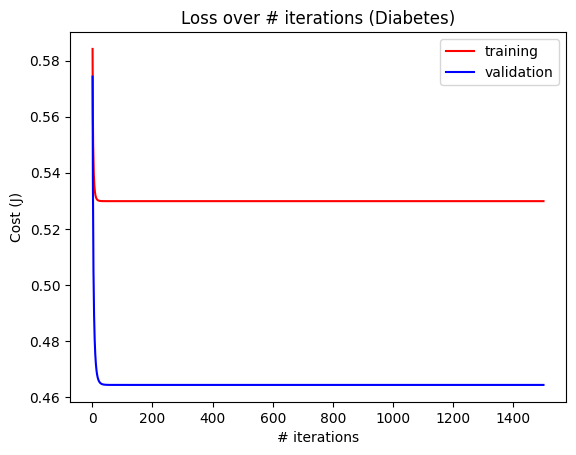

In [183]:
plt.plot(range(1, iterations + 1),cost_history_train1, color='red', label = 'training')
plt.plot(range(1, iterations + 1),cost_history_val1, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (Diabetes)')
plt.legend();

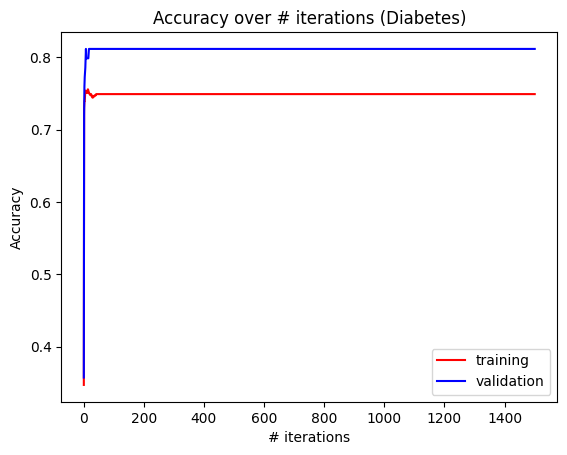

In [184]:
plt.plot(range(1, iterations + 1),accuracy_train1, color='red', label = 'training')
plt.plot(range(1, iterations + 1),accuracy_val1, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over # iterations (Diabetes)')
plt.legend();

In [185]:
classifier = LogisticRegression(random_state=42, penalty= None);
classifier.fit(X_train1, Y_train1);

In [186]:
predict = classifier.predict(X_val1)
#predict[0:20]

In [187]:
cf_mtx = confusion_matrix(Y_val1, predict);
cf_mtx;

In [188]:
print("---PROBLEM 1 METRICS---")
print("Accuracy:",metrics.accuracy_score(Y_val1, predict))
print("Precision:",metrics.precision_score(Y_val1, predict))
print("Recall:",metrics.recall_score(Y_val1, predict))
print("F1 Score:",metrics.f1_score(Y_val1, predict))

---PROBLEM 1 METRICS---
Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1 Score: 0.6607142857142857


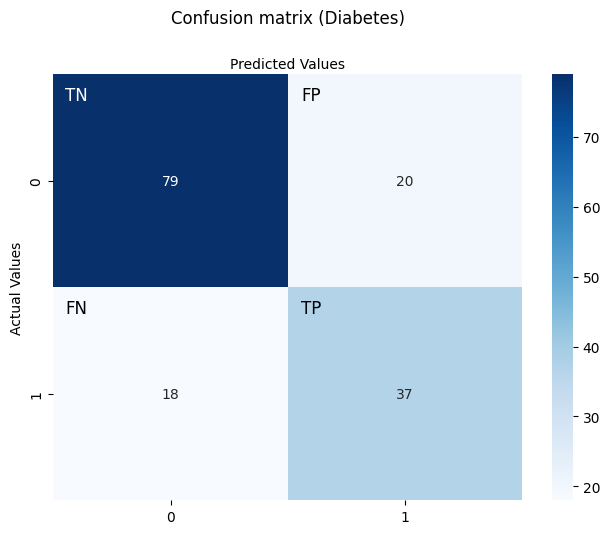

In [189]:
class_names=[0,1] # classes '0' and '1'
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) # create np array
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)                                   # cmap - color palette
                                                                      # annot - annotate each cell with numerical value
sbrn.heatmap(pd.DataFrame(cf_mtx), annot=True, cmap="Blues" ,fmt='g') # heatmap - graphical data depiction,
ax.xaxis.set_label_position("top")                                    # individual values are represented as colors.
plt.tight_layout() # auto-adjusts for subplot parameters
plt.title('Confusion matrix (Diabetes)', y=1.1) # y - vertical alignment
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');

# Add text for TN, FP, FN, TP
plt.text(0.1, 0.1, 'TN', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12);
plt.text(1.1, 0.1, 'FP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(0.1, 1.1, 'FN', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(1.1, 1.1, 'TP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);

# **PROBLEM 2-1**

In [190]:
binary_col = ['diagnosis'] # yes/no columns

# binary conversion: 1 - malignant 0 - benign
for col in binary_col:
    df_2[col] = df_2[col].map({'M': 1, 'B': 0})

X_2 = df_2.iloc[:, 2:32].values # .iloc indexing: .iloc[rows, cols]
Y_2 = df_2.iloc[:, 1]

#display(df_2.head()) # confirm conversion

#X_2[:5]

In [191]:
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_2, Y_2, test_size = 0.2, train_size = 0.8, random_state=42) # training/validation split

stdX_p4 = StandardScaler()                   # feature scaling
X_train_p4 = stdX.fit_transform(X_train2)   # fit - calculate mean and std deviation for each feature
X_val_p4 = stdX.transform(X_val2)           # transform - standardize data use parameters from 'fit'

normX2 = MinMaxScaler()
X_train2 = normX2.fit_transform(X_train2) # fit - calculate min/max values for each feature
X_val2 = normX2.transform(X_val2)         # transform - scale data between 0-1 using values from 'fit'

In [192]:
theta2 = np.zeros(X_train2.shape[1])
iterations2 = 10000;
alpha2 = 10;

theta_train2, cost_history_train2, accuracy_train2 = gradient_descent_LogReg(X_train2, Y_train2, theta2, alpha2, iterations2) # problem 2
theta_val2, cost_history_val2, accuracy_val2 = gradient_descent_LogReg(X_val2, Y_val2, theta2, alpha2, iterations2)

#print("Training Cost:", cost_history_train1[-1]) # final cost
#print("Validation Cost:", cost_history_val1[-1])
print("Training Accuracy:", accuracy_train2[-1]) # final accuracy
print("Validation Accuracy:", accuracy_val2[-1])

Training Accuracy: 0.9758241758241758
Validation Accuracy: 1.0


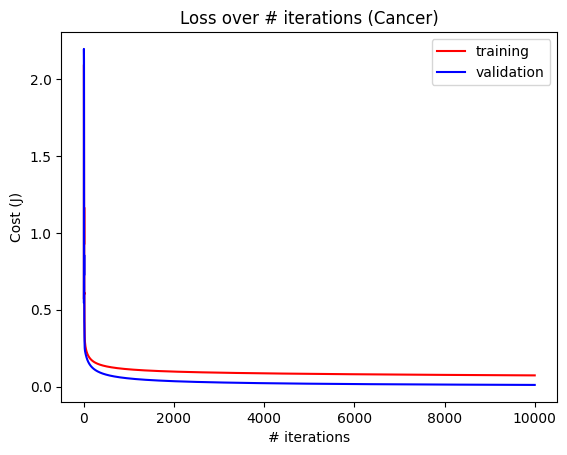

In [193]:
plt.plot(range(1, iterations2 + 1),cost_history_train2, color='red', label = 'training')
plt.plot(range(1, iterations2 + 1),cost_history_val2, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (Cancer)')
plt.legend();

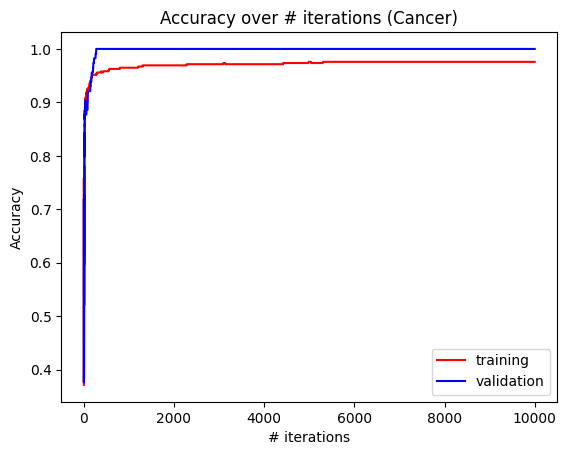

In [194]:
plt.plot(range(1, iterations2 + 1),accuracy_train2, color='red', label = 'training')
plt.plot(range(1, iterations2 + 1),accuracy_val2, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over # iterations (Cancer)')
plt.legend();

In [195]:
classifier2 = LogisticRegression(random_state=42, penalty = None);
classifier2.fit(X_train2, Y_train2);

classifier2b_L1 = LogisticRegression(random_state = 42, penalty ='l1', solver='liblinear'); # liblinear for L1, lbfgs for L2 (defaults to lbfgs)
classifier2b_L2 = LogisticRegression(random_state = 42, penalty ='l2');
classifier2b_L1.fit(X_train2, Y_train2);
classifier2b_L2.fit(X_train2, Y_train2);

In [196]:
predict2 = classifier2.predict(X_val2)
predict2b_L1 = classifier2b_L1.predict(X_val2)
predict2b_L2 = classifier2b_L2.predict(X_val2)
#predict[0:20]

In [197]:
cf_mtx2 = confusion_matrix(Y_val2, predict2);
cf_mtx2;

In [198]:
print("---PROBLEM 2-1 METRICS---")
print("Accuracy:",metrics.accuracy_score(Y_val2, predict2))
print("Precision:",metrics.precision_score(Y_val2, predict2))
print("Recall:",metrics.recall_score(Y_val2, predict2))
print("F1 Score:",metrics.f1_score(Y_val2, predict2))

---PROBLEM 2-1 METRICS---
Accuracy: 0.9122807017543859
Precision: 0.8367346938775511
Recall: 0.9534883720930233
F1 Score: 0.8913043478260869


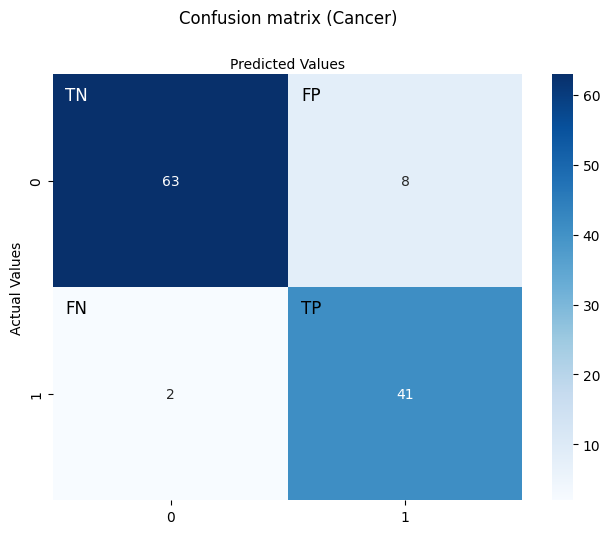

In [199]:
class_names=[0,1] # classes '0' and '1'
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) # create np array
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)                                    # cmap - color palette
                                                                       # annot - annotate each cell with numerical value
sbrn.heatmap(pd.DataFrame(cf_mtx2), annot=True, cmap="Blues" ,fmt='g') # heatmap - graphical data depiction,
ax.xaxis.set_label_position("top")                                     # individual values are represented as colors.
plt.tight_layout() # auto-adjusts for subplot parameters
plt.title('Confusion matrix (Cancer)', y=1.1) # y - vertical alignment
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');

plt.text(0.1, 0.1, 'TN', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12);
plt.text(1.1, 0.1, 'FP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(0.1, 1.1, 'FN', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(1.1, 1.1, 'TP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);

In [200]:
cf_mtx2b_L1 = confusion_matrix(Y_val2, predict2b_L1);
cf_mtx2b_L1;

In [201]:
cf_mtx2b_L2 = confusion_matrix(Y_val2, predict2b_L2);
cf_mtx2b_L2;

# **PROBLEM 2-2**

In [202]:
print("---PROBLEM 2-2 METRICS (L1)---")
print("Accuracy:",metrics.accuracy_score(Y_val2, predict2b_L1))
print("Precision:",metrics.precision_score(Y_val2, predict2b_L1))
print("Recall:",metrics.recall_score(Y_val2, predict2b_L1))
print("F1 Score:",metrics.f1_score(Y_val2, predict2b_L1))

---PROBLEM 2-2 METRICS (L1)---
Accuracy: 0.956140350877193
Precision: 0.9523809523809523
Recall: 0.9302325581395349
F1 Score: 0.9411764705882353


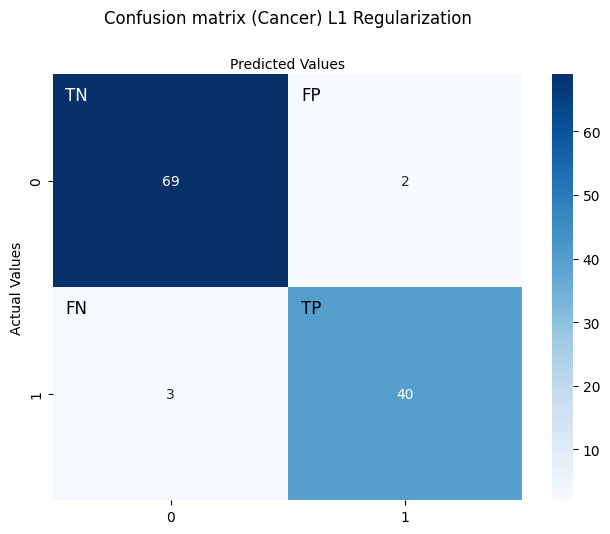

In [203]:
class_names=[0,1] # classes '0' and '1'
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) # create np array
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)                                    # cmap - color palette
                                                                       # annot - annotate each cell with numerical value
sbrn.heatmap(pd.DataFrame(cf_mtx2b_L1), annot=True, cmap="Blues" ,fmt='g') # heatmap - graphical data depiction,
ax.xaxis.set_label_position("top")                                     # individual values are represented as colors.
plt.tight_layout() # auto-adjusts for subplot parameters
plt.title('Confusion matrix (Cancer) L1 Regularization', y=1.1) # y - vertical alignment
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');

plt.text(0.1, 0.1, 'TN', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12);
plt.text(1.1, 0.1, 'FP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(0.1, 1.1, 'FN', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(1.1, 1.1, 'TP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);

In [204]:
print("---PROBLEM 2-2 METRICS (L2)---")
print("Accuracy:",metrics.accuracy_score(Y_val2, predict2b_L2))
print("Precision:",metrics.precision_score(Y_val2, predict2b_L2))
print("Recall:",metrics.recall_score(Y_val2, predict2b_L2))
print("F1 Score:",metrics.f1_score(Y_val2, predict2b_L2))

---PROBLEM 2-2 METRICS (L2)---
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 Score: 0.9761904761904762


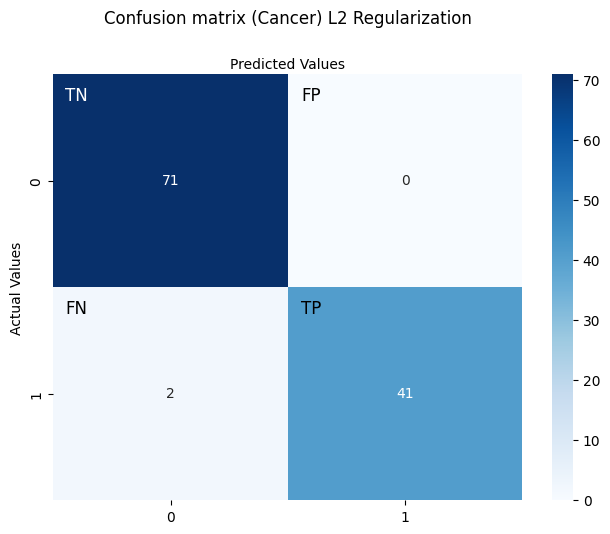

In [205]:
class_names=[0,1] # classes '0' and '1'
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) # create np array
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)                                    # cmap - color palette
                                                                       # annot - annotate each cell with numerical value
sbrn.heatmap(pd.DataFrame(cf_mtx2b_L2), annot=True, cmap="Blues" ,fmt='g') # heatmap - graphical data depiction,
ax.xaxis.set_label_position("top")                                     # individual values are represented as colors.
plt.tight_layout() # auto-adjusts for subplot parameters
plt.title('Confusion matrix (Cancer) L2 Regularization', y=1.1) # y - vertical alignment
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');

plt.text(0.1, 0.1, 'TN', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12);
plt.text(1.1, 0.1, 'FP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(0.1, 1.1, 'FN', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(1.1, 1.1, 'TP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);

In [206]:
import numpy as np

def sigmoid(z):
    """
    Sigmoid function
    """
    return 1 / (1 + np.exp(-z))

def compute_cost_LogReg_L2(X, y, theta, lambda_reg):
    """
    Modified compute cost for Logistic Regression with L2 regularization
    """
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Add L2 regularization term
    l2_reg_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
    cost = cost + l2_reg_term

    return cost

def gradient_descent_LogReg_L2(X, y, theta, alpha, iterations, lambda_reg):
    """
    Modified gradient descent for Logistic Regression with L2 regularization
    """
    m = len(y)
    cost_history = []
    accuracy = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradient = (1 / m) * X.transpose().dot(errors)

        # Add L2 regularization gradient term
        gradient[1:] = gradient[1:] + (lambda_reg / m) * theta[1:]

        theta = theta - alpha * gradient

        # Calculate cost
        cost_history.append(compute_cost_LogReg_L2(X, y, theta, lambda_reg))

        # Calculate accuracy
        predicted_classes = (predictions >= 0.5).astype(int)
        current_accuracy = np.mean(predicted_classes == y)
        accuracy.append(current_accuracy)

    return theta, cost_history, accuracy

In [207]:
lambda_reg2b = 0.1

theta2b = np.zeros(X_train2.shape[1])
iterations2b = 6500;
alpha2b = 6.5;

theta_train2b, cost_history_train2b, accuracy_train2b = gradient_descent_LogReg_L2(X_train2, Y_train2, theta2b, alpha2b, iterations2b, lambda_reg2b) # problem 2-2
theta_val2b, cost_history_val2b, accuracy_val2b = gradient_descent_LogReg_L2(X_val2, Y_val2, theta2b, alpha2b, iterations2b, lambda_reg2b)

#print("Training Cost:", cost_history_train1[-1]) # final cost
#print("Validation Cost:", cost_history_val1[-1])
print("Training Accuracy:", accuracy_train2b[-1]) # final accuracy
print("Validation Accuracy:", accuracy_val2b[-1])

Training Accuracy: 0.9582417582417583
Validation Accuracy: 0.9385964912280702


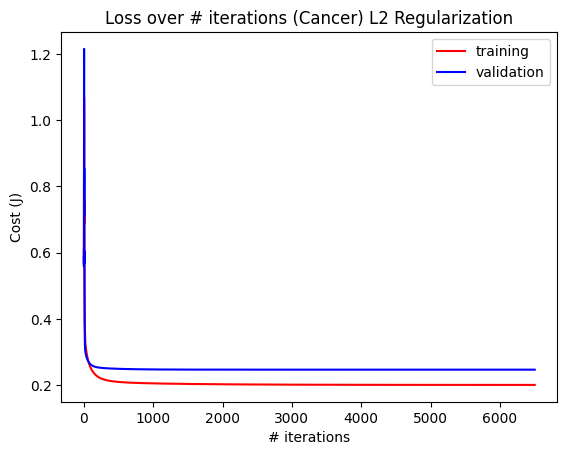

In [208]:
plt.plot(range(1, iterations2b + 1),cost_history_train2b, color='red', label = 'training')
plt.plot(range(1, iterations2b + 1),cost_history_val2b, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Cost (J)')
plt.title('Loss over # iterations (Cancer) L2 Regularization')
plt.legend();

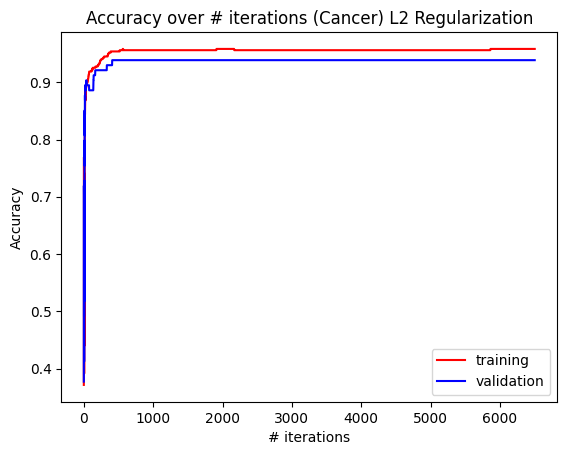

In [209]:
plt.plot(range(1, iterations2b + 1),accuracy_train2b, color='red', label = 'training')
plt.plot(range(1, iterations2b + 1),accuracy_val2b, color='blue', label = 'validation')

plt.xlabel('# iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy over # iterations (Cancer) L2 Regularization')
plt.legend();

# **PROBLEM 3**

In [210]:
nb_classifier = GaussianNB();
nb_classifier.fit(X_train2, Y_train2);

In [211]:
nb_predict = nb_classifier.predict(X_val2)

In [212]:
nb_accuracy = metrics.accuracy_score(Y_val2, nb_predict)
nb_precision = metrics.precision_score(Y_val2, nb_predict)
nb_recall = metrics.recall_score(Y_val2, nb_predict)
nb_f1_score = metrics.f1_score(Y_val2, nb_predict)
nb_cf_mtx = confusion_matrix(Y_val2, nb_predict)

print("---PROBLEM 3 METRICS (Naive Bayes)---")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)
print("Confusion Matrix:\n", nb_cf_mtx);

---PROBLEM 3 METRICS (Naive Bayes)---
Accuracy: 0.9649122807017544
Precision: 0.975609756097561
Recall: 0.9302325581395349
F1 Score: 0.9523809523809523
Confusion Matrix:
 [[70  1]
 [ 3 40]]


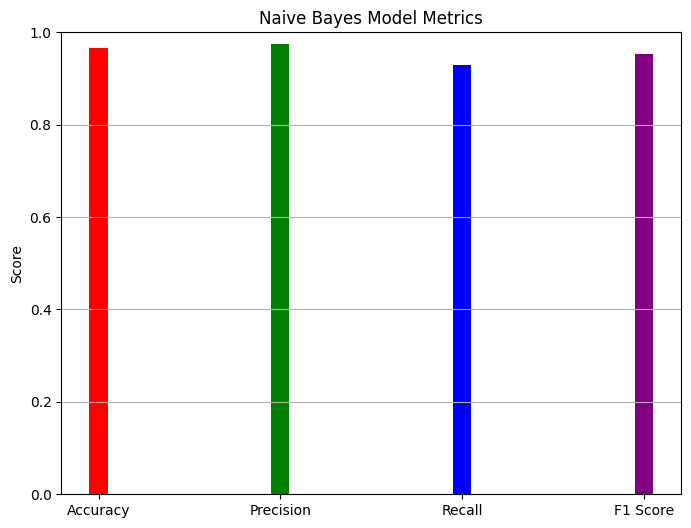

In [213]:
p3_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_metrics = [nb_accuracy, nb_precision, nb_recall, nb_f1_score]

plt.figure(figsize=(8, 6))
plt.bar(p3_metrics, nb_metrics, color=['red', 'green', 'blue', 'purple'], width=0.1)
plt.ylabel('Score')
plt.title('Naive Bayes Model Metrics')
plt.ylim(0, 1) # Set y-axis limit between 0 and 1
plt.grid(axis="y")
plt.show()

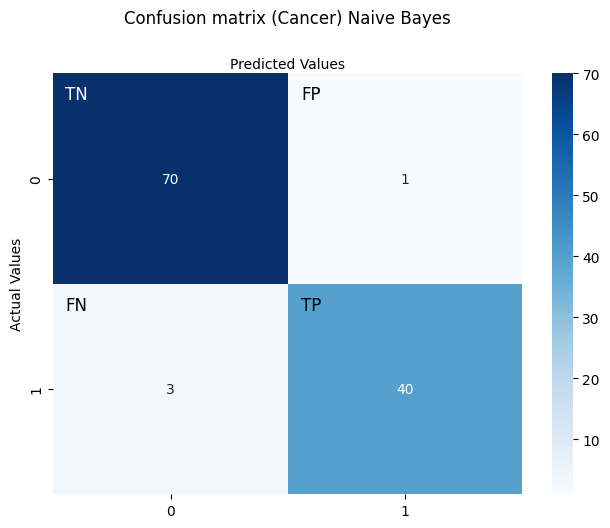

In [214]:
class_names=[0,1] # classes '0' and '1'
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names)) # create np array
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)                                    # cmap - color palette
                                                                       # annot - annotate each cell with numerical value
sbrn.heatmap(pd.DataFrame(nb_cf_mtx), annot=True, cmap="Blues" ,fmt='g') # heatmap - graphical data depiction,
ax.xaxis.set_label_position("top")                                     # individual values are represented as colors.
plt.tight_layout() # auto-adjusts for subplot parameters
plt.title('Confusion matrix (Cancer) Naive Bayes', y=1.1) # y - vertical alignment
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');

plt.text(0.1, 0.1, 'TN', horizontalalignment='center', verticalalignment='center', color='white', fontsize=12);
plt.text(1.1, 0.1, 'FP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(0.1, 1.1, 'FN', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);
plt.text(1.1, 1.1, 'TP', horizontalalignment='center', verticalalignment='center', color='black', fontsize=12);

# **PROBLEM 4**

In [215]:
pca = PCA()
XY_PCA = pca.fit_transform(X_train_p4)

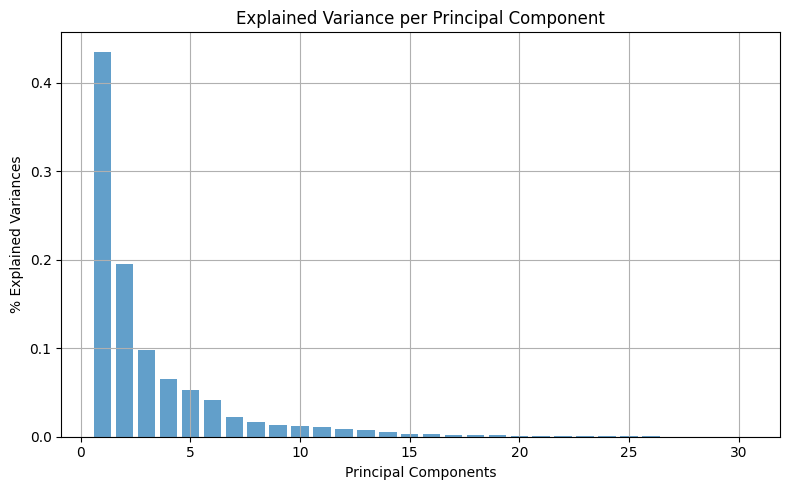

In [216]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.7)
plt.title("Explained Variance per Principal Component")
plt.xlabel("Principal Components")
plt.ylabel("% Explained Variances")
plt.grid(True)
plt.tight_layout()
plt.show()

In [217]:
#print(pca.explained_variance_ratio_)

In [218]:
#print(pca.singular_values_)

In [219]:
pca_results = [] # empty lists for results and confusion matrix
cf_mts = []

# for loop to perform 'n' number of independent training
# pca + logistic regression
for n in range(1,30):
  pca = PCA(n_components=n)
  X_train_pca = pca.fit_transform(X_train_p4)
  X_val_pca = pca.transform(X_val_p4)

  log_reg_pca = LogisticRegression()
  log_reg_pca.fit(X_train_pca, Y_train2)
  predict_pca = log_reg_pca.predict(X_val_pca)

  pca_accuracy = metrics.accuracy_score(Y_val2, predict_pca)
  pca_precision = metrics.precision_score(Y_val2, predict_pca)
  pca_recall = metrics.recall_score(Y_val2, predict_pca)
  pca_f1 = metrics.f1_score(Y_val2, predict_pca)
  pca_cf_mtx = confusion_matrix(Y_val2, predict_pca)
# .append to create a results list
  pca_results.append({
      "PCA Components": n,
      "Accuracy": pca_accuracy,
      "Precision": pca_precision,
      "Recall": pca_recall,
      "F1 Score": pca_f1
  })

  # .append the confusion matrix to the list
  cf_mts.append(pca_cf_mtx)

# using list to create DataFrame
pca_results_df = pd.DataFrame(pca_results)
display(pca_results_df)

# loop through the cf_mts list to print all confusion matrices
for i, cf_mts_pca in enumerate(cf_mts):
  print(f"\nConfusion Matrix for PCA Component #{i+1}:\n{cf_mts_pca}")

,PCA Components,Accuracy,Precision,Recall,F1 Score
0,1,0.947368,0.974359,0.883721,0.926829
1,2,0.991228,1.000000,0.976744,0.988235
2,3,0.982456,1.000000,0.953488,0.976190
3,4,0.973684,0.976190,0.953488,0.964706
4,5,0.982456,0.976744,0.976744,0.976744
5,6,0.982456,0.976744,0.976744,0.976744
6,7,0.982456,0.976744,0.976744,0.976744
7,8,0.991228,1.000000,0.976744,0.988235
8,9,0.982456,0.976744,0.976744,0.976744
9,10,0.982456,0.976744,0.976744,0.976744



Confusion Matrix for PCA Component #1:
[[70  1]
 [ 5 38]]

Confusion Matrix for PCA Component #2:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #3:
[[71  0]
 [ 2 41]]

Confusion Matrix for PCA Component #4:
[[70  1]
 [ 2 41]]

Confusion Matrix for PCA Component #5:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #6:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #7:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #8:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #9:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #10:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #11:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #12:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #13:
[[70  1]
 [ 1 42]]

Confusion Matrix for PCA Component #14:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #15:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #16:
[[71  0]
 [ 1 42]]

Confusion Matrix for PCA Component #17:
[[71  0]

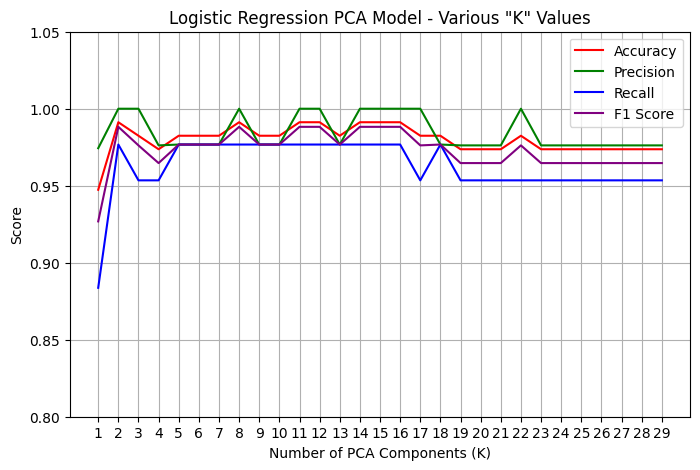

In [220]:
plt.figure(figsize=(8, 5))

plt.plot(pca_results_df['PCA Components'], pca_results_df['Accuracy'],linestyle='-', color='red', label='Accuracy')

plt.plot(pca_results_df['PCA Components'], pca_results_df['Precision'],linestyle='-', color='green', label='Precision')

plt.plot(pca_results_df['PCA Components'], pca_results_df['Recall'], linestyle='-', color='blue', label='Recall')

plt.plot(pca_results_df['PCA Components'], pca_results_df['F1 Score'], linestyle='-', color='purple', label='F1 Score')

plt.xlabel('Number of PCA Components (K)')
plt.ylabel('Score')
plt.title('Logistic Regression PCA Model - Various "K" Values')
plt.legend()
plt.grid(True)
plt.xticks(pca_results_df['PCA Components'])
plt.ylim(0.8, 1.05)
plt.show()

# **PROBLEM 5**

In [221]:
pca_nb = PCA()
XY_PCA_nb = pca_nb.fit_transform(X_train_p4)

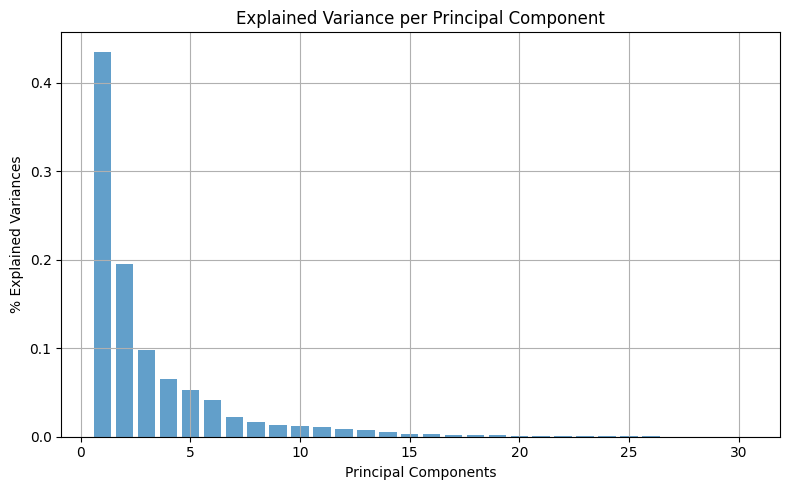

In [222]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca_nb.explained_variance_ratio_)+1), pca_nb.explained_variance_ratio_, alpha=0.7)
plt.title("Explained Variance per Principal Component")
plt.xlabel("Principal Components")
plt.ylabel("% Explained Variances")
plt.grid(True)
plt.tight_layout()
plt.show()

In [223]:
pca_results_nb = [] # empty lists for results and confusion matrix
cf_mts_nb = []

# for loop to perform 'n' number of independent training
# pca + naive bayes
for k in range(1,30):
  pca5_nb = PCA(n_components=k)
  X_train_pca_nb = pca5_nb.fit_transform(X_train_p4)
  X_val_pca_nb = pca5_nb.transform(X_val_p4)

  nb_classifier_p5 = GaussianNB();
  nb_classifier_p5.fit(X_train_pca_nb, Y_train2);
  nb_predict_p5 = nb_classifier_p5.predict(X_val_pca_nb)

  pca_accuracy_nb = metrics.accuracy_score(Y_val2, nb_predict_p5)
  pca_precision_nb = metrics.precision_score(Y_val2, nb_predict_p5)
  pca_recall_nb = metrics.recall_score(Y_val2, nb_predict_p5)
  pca_f1_nb = metrics.f1_score(Y_val2, nb_predict_p5)
  pca_cf_mtx_nb = confusion_matrix(Y_val2, nb_predict_p5)

# .append to create a results list
  pca_results_nb.append({
      "PCA Components": k,
      "Accuracy": pca_accuracy_nb,
      "Precision": pca_precision_nb,
      "Recall": pca_recall_nb,
      "F1 Score": pca_f1_nb
  })

  # .append the confusion matrix to the list
  cf_mts_nb.append(pca_cf_mtx_nb)

# using list to create DataFrame
pca_results_df_nb = pd.DataFrame(pca_results_nb)
display(pca_results_df_nb)

# loop through the cf_mts_nb list to print all confusion matrices
for i, cf_mts_pca_nb in enumerate(cf_mts_nb):
  print(f"\nConfusion Matrix for PCA Component #{i+1}:\n{cf_mts_pca_nb}")

,PCA Components,Accuracy,Precision,Recall,F1 Score
0,1,0.929825,0.972973,0.837209,0.900000
1,2,0.947368,0.974359,0.883721,0.926829
2,3,0.947368,0.974359,0.883721,0.926829
3,4,0.938596,0.950000,0.883721,0.915663
4,5,0.947368,0.951220,0.906977,0.928571
5,6,0.947368,0.951220,0.906977,0.928571
6,7,0.912281,0.923077,0.837209,0.878049
7,8,0.921053,0.947368,0.837209,0.888889
8,9,0.921053,0.947368,0.837209,0.888889
9,10,0.921053,0.947368,0.837209,0.888889



Confusion Matrix for PCA Component #1:
[[70  1]
 [ 7 36]]

Confusion Matrix for PCA Component #2:
[[70  1]
 [ 5 38]]

Confusion Matrix for PCA Component #3:
[[70  1]
 [ 5 38]]

Confusion Matrix for PCA Component #4:
[[69  2]
 [ 5 38]]

Confusion Matrix for PCA Component #5:
[[69  2]
 [ 4 39]]

Confusion Matrix for PCA Component #6:
[[69  2]
 [ 4 39]]

Confusion Matrix for PCA Component #7:
[[68  3]
 [ 7 36]]

Confusion Matrix for PCA Component #8:
[[69  2]
 [ 7 36]]

Confusion Matrix for PCA Component #9:
[[69  2]
 [ 7 36]]

Confusion Matrix for PCA Component #10:
[[69  2]
 [ 7 36]]

Confusion Matrix for PCA Component #11:
[[69  2]
 [ 7 36]]

Confusion Matrix for PCA Component #12:
[[69  2]
 [ 7 36]]

Confusion Matrix for PCA Component #13:
[[70  1]
 [ 6 37]]

Confusion Matrix for PCA Component #14:
[[70  1]
 [ 6 37]]

Confusion Matrix for PCA Component #15:
[[68  3]
 [ 6 37]]

Confusion Matrix for PCA Component #16:
[[68  3]
 [ 6 37]]

Confusion Matrix for PCA Component #17:
[[68  3]

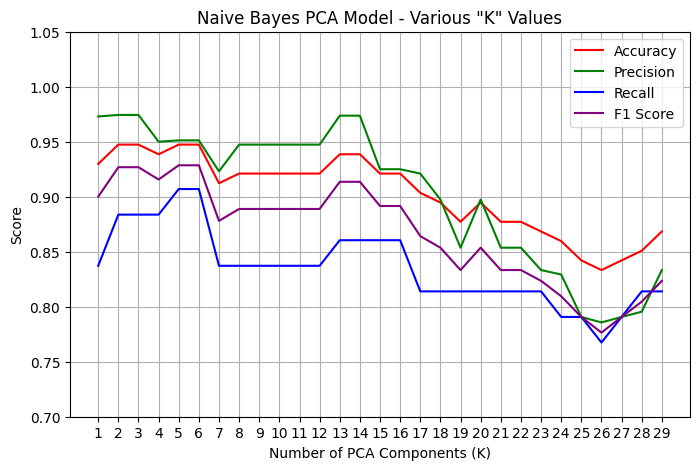

In [224]:
plt.figure(figsize=(8, 5))

plt.plot(pca_results_df_nb['PCA Components'], pca_results_df_nb['Accuracy'],linestyle='-', color='red', label='Accuracy')

plt.plot(pca_results_df_nb['PCA Components'], pca_results_df_nb['Precision'],linestyle='-', color='green', label='Precision')

plt.plot(pca_results_df_nb['PCA Components'], pca_results_df_nb['Recall'], linestyle='-', color='blue', label='Recall')

plt.plot(pca_results_df_nb['PCA Components'], pca_results_df_nb['F1 Score'], linestyle='-', color='purple', label='F1 Score')

plt.xlabel('Number of PCA Components (K)')
plt.ylabel('Score')
plt.title('Naive Bayes PCA Model - Various "K" Values')
plt.legend()
plt.grid(True)
plt.xticks(pca_results_df_nb['PCA Components']) # Ensure all K values are shown on the x-axis
plt.ylim(0.7, 1.05) # Adjust y-axis limits if needed to better visualize differences
plt.show()